In [1]:
import numpy as np 
import pandas as pd
import cv2

In [2]:
name="networksecurity"

In [3]:
print("The Original String is:- "+name)

The Original String is:- networksecurity


In [4]:
res=''.join(format(ord(i),'b')for i in name)

In [5]:
print(res)

110111011001011110100111011111011111110010110101111100111100101110001111101011110010110100111101001111001


In [6]:
def BinaryTointeger(binary):  
         
    binary1 = binary  
    decimal, i, n = 0, 0, 0
    while(binary != 0):  
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)  
        binary = binary//10
        i += 1
    return (decimal)     

bin_data =res
   
print("The binary value is:", bin_data) 
   

str_data =' '
   

for i in range(0, len(bin_data), 7): 
    temp_data = int(bin_data[i:i + 7]) 
    decimal_data = BinaryTointeger(temp_data) 
    str_data = str_data + chr(decimal_data)  

print("The Binary value after string conversion is:",str_data) 

The binary value is: 110111011001011110100111011111011111110010110101111100111100101110001111101011110010110100111101001111001
The Binary value after string conversion is:  networksecurity


In [7]:
def message2binary(message):
    if type(message) == str:
        result= ''.join([ format(ord(i), "08b") for i in message ])
    
    elif type(message) == bytes or type(message) == np.ndarray:
        result= [ format(i, "08b") for i in message ]
    
    elif type(message) == int or type(message) == np.uint8:
        result=format(message, "08b")

    else:
        raise TypeError("Input type is not supported")
    
    return result  

In [8]:
from IPython.display import Image
import os

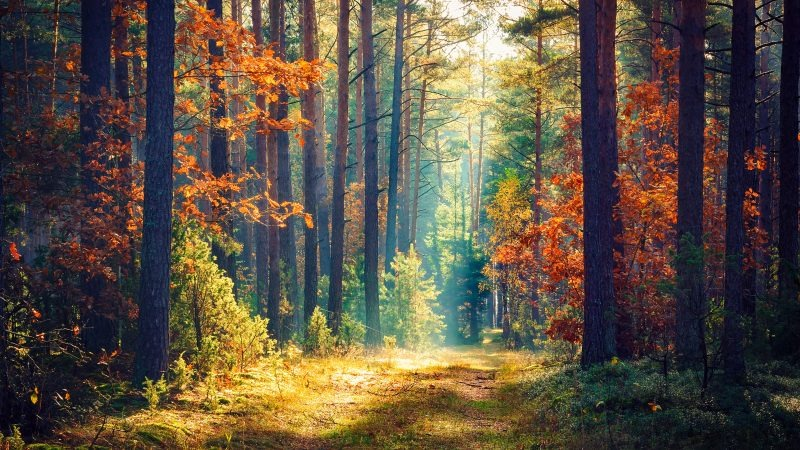

In [9]:
Image('picture1.jpeg')

In [10]:
img = cv2.imread('picture1.jpeg', cv2.IMREAD_UNCHANGED)
 
print('Original Dimensions : ',img.shape)
 
scale_percent = 220 # percent of original size
width = int(img.shape[1] * scale_percent / 400)
height = int(img.shape[0] * scale_percent / 400)
dim = (width, height)
  
# resize image
image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
 
print('Resized Dimensions : ',image.shape)
 
cv2.imshow("Resized image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Original Dimensions :  (450, 800, 3)
Resized Dimensions :  (247, 440, 3)


In [11]:
h='1000110'
int(h[:-1]+'1',2)

71

In [12]:
list1=[ ]

In [13]:
def encode_data(img):
    data=input("Enter the data to be Encoded:")    
    if (len(data) == 0): 
        raise ValueError('Data is empty')
  
    filename = input("Enter the name of the New Image after Encoding(with extension):")
    
    no_bytes=(img.shape[0] * img.shape[1] * 3) // 8
    
    print("Maximum bytes to encode:", no_bytes)
    
    if(len(data)>no_bytes):
        raise ValueError("Error encountered Insufficient bytes, Need Bigger Image or give Less Data !!")
    
    data +='*****'    
    
    data_binary=message2binary(data)
    print(data_binary)
    data_len=len(data_binary)
    
    print("The Length of Binary data",data_len)
    
    data_index = 0
    
    for i in img:
        for pixel in i:
            r, g, b = message2binary(pixel)
            if data_index < data_len:
                pixel[0] = int(r[:-1] + data_binary[data_index], 2)
                data_index += 1
                list1.append(pixel[0])

            if data_index < data_len:
                pixel[1] = int(g[:-1] + data_binary[data_index], 2) 
                data_index += 1
                list1.append(pixel[1])

            if data_index < data_len:
                pixel[2] = int(b[:-1] + data_binary[data_index], 2) 
                data_index += 1
                list1.append(pixel[2])

            if data_index >= data_len:
                break

        
    cv2.imwrite(filename,img)
    
    print("Encoded the data successfully and the image is successfully saved as ",filename)

In [14]:
encode_data(image)

Enter the data to be Encoded:network security and cryptography
Enter the name of the New Image after Encoding(with extension):encoded_picture1.png
Maximum bytes to encode: 40755
0110111001100101011101000111011101101111011100100110101100100000011100110110010101100011011101010111001001101001011101000111100100100000011000010110111001100100001000000110001101110010011110010111000001110100011011110110011101110010011000010111000001101000011110010010101000101010001010100010101000101010
The Length of Binary data 304
Encoded the data successfully and the image is successfully saved as  encoded_picture1.png


In [15]:
def decode_data(img):
    binary_data = ""
    for i in img:
        for pixel in i:
            r, g, b = message2binary(pixel)
            binary_data += r[-1] 
            binary_data += g[-1]
            binary_data += b[-1]
    all_bytes = [ binary_data[i: i+8] for i in range(0, len(binary_data), 8)]
    decoded_data = ""
    for byte in all_bytes:
        decoded_data += chr(int(byte, 2))
        if decoded_data[-5:] == "*****":
            break

    print("The Encoded data was :--",decoded_data[:-5])

In [16]:
image1=cv2.imread("encoded_picture1.png")

In [17]:
decode_data(image1)

The Encoded data was :-- network security and cryptography


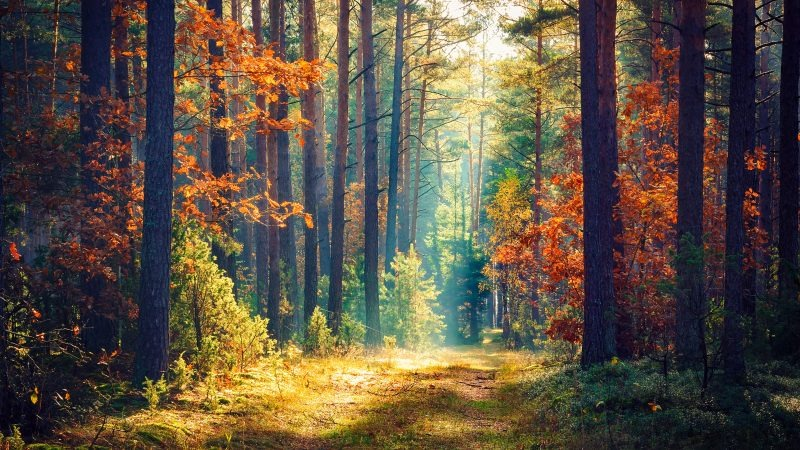

In [18]:
#original image
Image('picture1.jpeg')

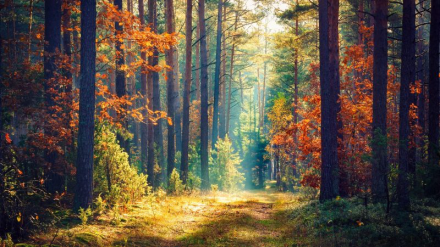

In [19]:
#after encoding
Image('encoded_picture1.png')

### Steganography was applied on other pictures as well.